# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


#### Usage:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

In [41]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [42]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [43]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [64]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (25000, 300)
y_train (25000,)
x_test (25000, 300)
y_test (25000,)


In [65]:
# # Printing no of words in X_train
print(len(np.unique(np.hstack(x_train)))) 
# # Printing no of words in X_test
print(len(np.unique(np.hstack(x_test))))

9999
9943


## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [77]:
model=Sequential()
model.add(Embedding(vocab_size,maxlen,input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(LSTM(units=1,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 1208      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 3,001,210
Trainable params: 3,001,210
Non-trainable params: 0
_________________________________________________________________


## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [79]:
output= model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 133s 5ms/sample - loss: 0.6375 - acc: 0.6580 - val_loss: 0.5497 - val_acc: 0.7421
Epoch 2/5
25000/25000 [==============================] - 127s 5ms/sample - loss: 0.4401 - acc: 0.8331 - val_loss: 0.4171 - val_acc: 0.8364
Epoch 3/5
25000/25000 [==============================] - 131s 5ms/sample - loss: 0.3078 - acc: 0.9059 - val_loss: 0.3990 - val_acc: 0.8412
Epoch 4/5
25000/25000 [==============================] - 131s 5ms/sample - loss: 0.2405 - acc: 0.9364 - val_loss: 0.3873 - val_acc: 0.8463
Epoch 5/5
25000/25000 [==============================] - 131s 5ms/sample - loss: 0.1992 - acc: 0.9520 - val_loss: 0.3910 - val_acc: 0.8442


In [80]:
output.history

{'loss': [0.6374938672065735,
  0.4400605433273315,
  0.3077662169551849,
  0.24051223070144653,
  0.1991963252592087],
 'acc': [0.658, 0.83308, 0.90588, 0.93644, 0.95204],
 'val_loss': [0.5496573337173462,
  0.41710951095581056,
  0.3990445797920227,
  0.3872507314109802,
  0.3910269989681244],
 'val_acc': [0.74212, 0.83644, 0.84116, 0.84632, 0.8442]}

In [81]:
def plot_learningCurve(output,epochs):
    #plot training & validation accuracy values
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,output.history['acc'])
    plt.plot(epoch_range,output.history['val_acc'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','val'],loc='upper left')
    plt.show()
    
    #plot training & validation loss issues
    plt.plot(epoch_range,output.history['loss'])
    plt.plot(epoch_range,output.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','val'],loc='upper left')
    plt.show() 

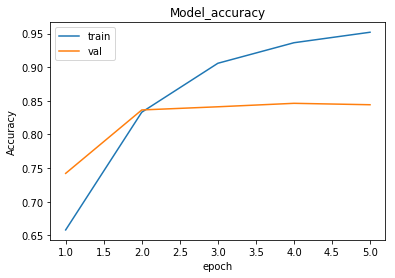

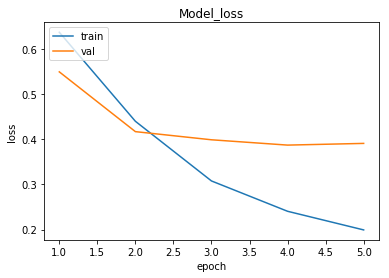

In [82]:
plot_learningCurve(output,5)

In [83]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8442


In [84]:
pred = model.predict_classes(x_test)

In [85]:
from sklearn.metrics import confusion_matrix
LABELS = ['negative', 'positive']

# Print Precision Recall F1-Score Report
from sklearn.metrics import classification_report

report = classification_report(pred, y_test, target_names=LABELS)
print(report)

              precision    recall  f1-score   support

    negative       0.84      0.85      0.84     12417
    positive       0.85      0.84      0.84     12583

   micro avg       0.84      0.84      0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

